# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer

# Read Data

In [2]:
train_path = r"D:\tune\train_data\train.json"
df = pd.read_json(train_path, lines=True)


In [7]:
def categorize_age(age):
    if pd.isna(age):
        return np.nan
    elif age < 25:
        return 'Less than 25'
    elif age <= 45:
        return '25 - 45'
    else:
        return 'Greater than 45'

df['age_cat'] = df['age'].apply(categorize_age)

In [9]:
df.drop(columns=['age'], inplace=True)

In [10]:
df.head(10)

,sex,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,age_cat
0,Male,Caucasian,NaN,0.0,NaN,0.0,None,0,NaN
1,Male,African-American,2.0,3.0,NaN,8.0,F,0,25 - 45
2,None,African-American,0.0,0.0,0.0,0.0,M,1,25 - 45
3,Male,African-American,0.0,NaN,0.0,NaN,M,1,Less than 25
4,None,None,0.0,1.0,0.0,3.0,F,0,25 - 45
5,None,None,0.0,0.0,NaN,4.0,None,0,NaN
6,None,African-American,0.0,0.0,NaN,12.0,M,0,Greater than 45
7,Male,Caucasian,0.0,0.0,0.0,NaN,M,0,Greater than 45
8,None,None,0.0,0.0,0.0,6.0,F,1,25 - 45
9,None,African-American,0.0,0.0,0.0,1.0,None,0,25 - 45


In [4]:
df.columns

Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3950 non-null   object 
 1   age              3951 non-null   float64
 2   race             3928 non-null   object 
 3   juv_fel_count    3914 non-null   float64
 4   juv_misd_count   3907 non-null   float64
 5   juv_other_count  3945 non-null   float64
 6   priors_count     3944 non-null   float64
 7   c_charge_degree  3925 non-null   object 
 8   two_year_recid   5049 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 355.1+ KB


In [42]:
df.isnull().sum()

sex                1099
age                1098
race               1121
juv_fel_count      1135
juv_misd_count     1142
juv_other_count    1104
priors_count       1105
c_charge_degree    1124
two_year_recid        0
dtype: int64

In [10]:
df.nunique()

sex                 2
age                61
race                6
juv_fel_count      10
juv_misd_count      6
juv_other_count     9
priors_count       34
c_charge_degree     2
two_year_recid      2
dtype: int64

In [12]:
features = ["sex", "race", "c_charge_degree"]

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(df, features)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              3950 non-null   category
 1   age              3951 non-null   float64 
 2   race             3928 non-null   category
 3   juv_fel_count    3914 non-null   float64 
 4   juv_misd_count   3907 non-null   float64 
 5   juv_other_count  3945 non-null   float64 
 6   priors_count     3944 non-null   float64 
 7   c_charge_degree  3925 non-null   category
 8   two_year_recid   5049 non-null   int64   
dtypes: category(3), float64(5), int64(1)
memory usage: 252.0 KB


In [ ]:
# Distribution of numerical features
df.describe()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid
count,3951.000000,3914.000000,3907.000000,3945.000000,3944.000000,5049.000000
mean,34.609719,0.067195,0.072434,0.104943,3.403398,0.450584
std,12.028491,0.526169,0.361520,0.467654,4.750941,0.497601
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,42.000000,0.000000,0.000000,0.000000,5.000000,1.000000
max,96.000000,20.000000,5.000000,9.000000,38.000000,1.000000


In [ ]:
# Distribution of category features
df.describe(include=["category"])

,sex,race,c_charge_degree
count,3950,3928,3925
unique,2,6,2
top,Male,African-American,F
freq,3174,2031,2585


# Exploratory Data Analyst (EDA)

In [16]:
# Target variable: two_year_recid
df["two_year_recid"].value_counts().to_frame()

,count
two_year_recid,
0,2774
1,2275


In [17]:
df["two_year_recid"].value_counts(normalize=True).to_frame()

,proportion
two_year_recid,
0,0.549416
1,0.450584


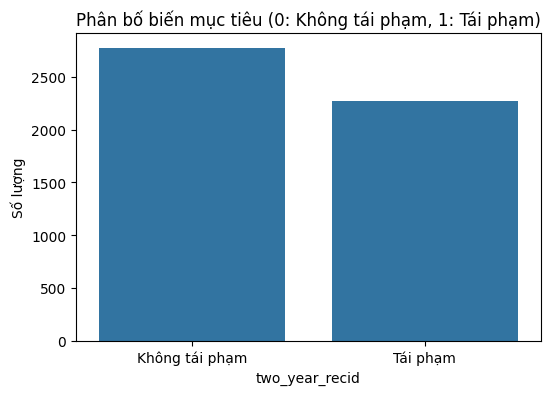

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='two_year_recid', data=df)
plt.title('Phân bố biến mục tiêu (0: Không tái phạm, 1: Tái phạm)')
plt.xlabel('two_year_recid')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=['Không tái phạm', 'Tái phạm'])
plt.show()

In [50]:
num_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
cat_features = ['sex', 'race', 'c_charge_degree']

## EDA for Category Features

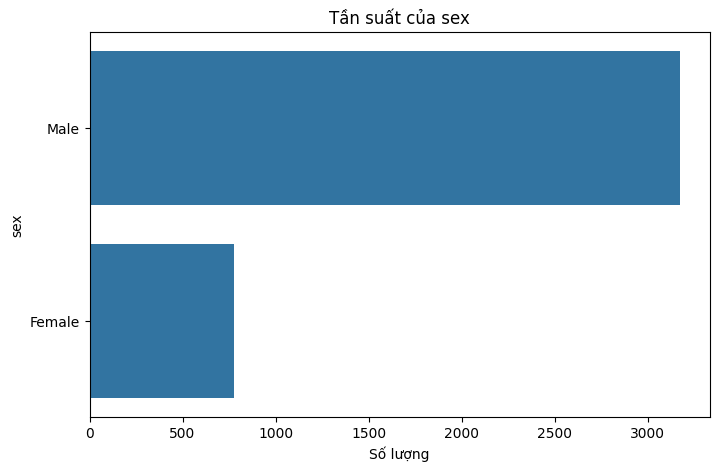


Tần suất của sex:
sex
Male      0.803544
Female    0.196456
Name: proportion, dtype: float64


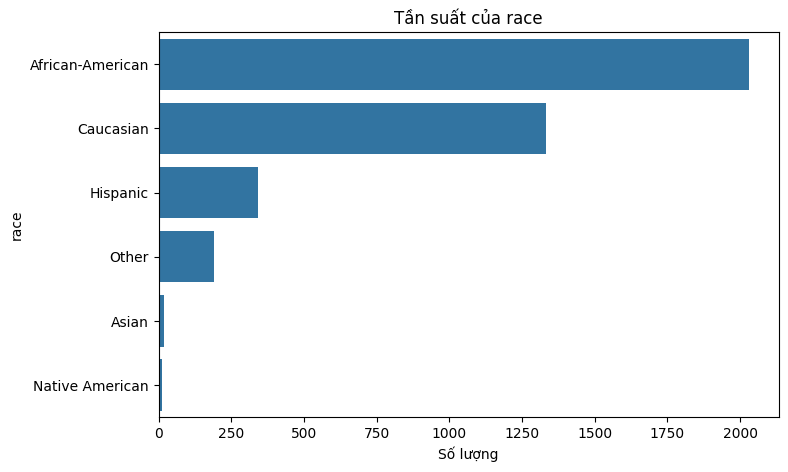


Tần suất của race:
race
African-American    0.517057
Caucasian           0.339613
Hispanic            0.087322
Other               0.048880
Asian               0.004582
Native American     0.002546
Name: proportion, dtype: float64


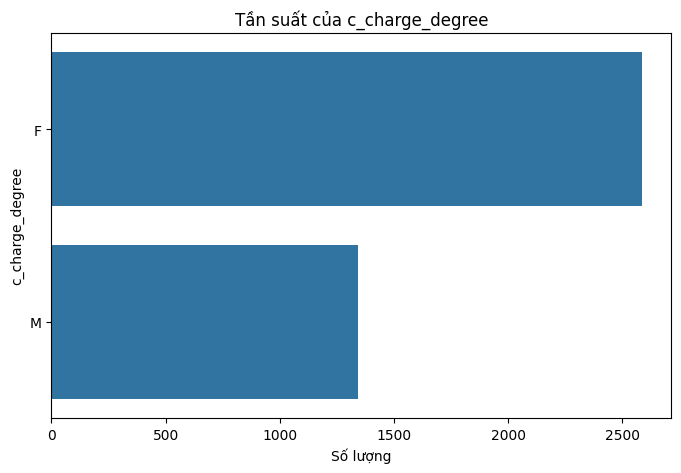


Tần suất của c_charge_degree:
c_charge_degree
F    0.658599
M    0.341401
Name: proportion, dtype: float64


In [51]:
for col in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index) # Sử dụng y để trục là category, order theo tần suất giảm dần
    plt.title(f'Tần suất của {col}')
    plt.xlabel('Số lượng')
    plt.ylabel(col)
    plt.show()
    print(f"\nTần suất của {col}:")
    print(df[col].value_counts(normalize=True))

<Axes: xlabel='sex', ylabel='count'>

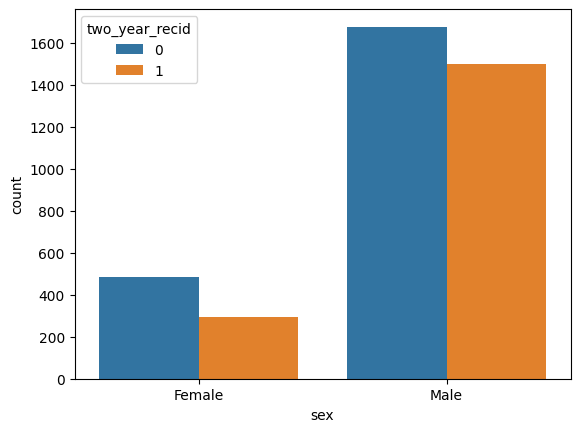

In [26]:
sns.countplot(data=df, x="sex", hue="two_year_recid")


Tỷ lệ tái phạm theo sex:
sex
Male      0.471960
Female    0.377577
Name: two_year_recid, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_8372\2754077026.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recid_rate = df.groupby(col)['two_year_recid'].mean().sort_values(ascending=False)


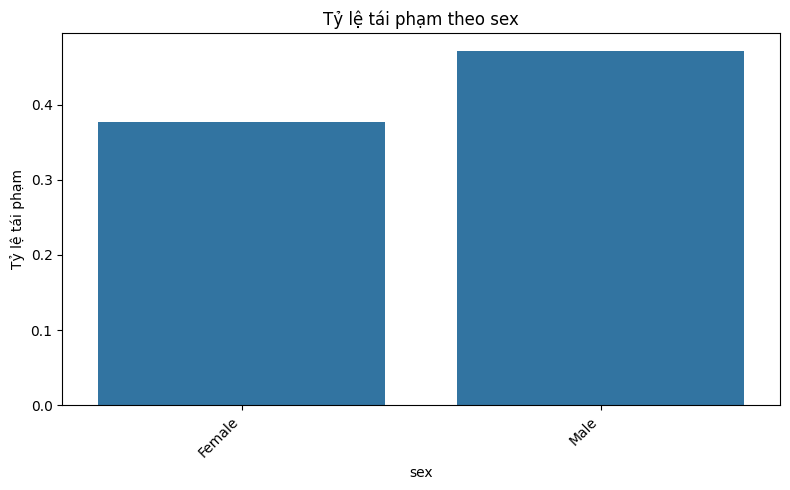

C:\Users\admin\AppData\Local\Temp\ipykernel_8372\2754077026.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recid_rate = df.groupby(col)['two_year_recid'].mean().sort_values(ascending=False)



Tỷ lệ tái phạm theo race:
race
Native American     0.600000
African-American    0.507139
Caucasian           0.382309
Other               0.380208
Hispanic            0.379009
Asian               0.277778
Name: two_year_recid, dtype: float64


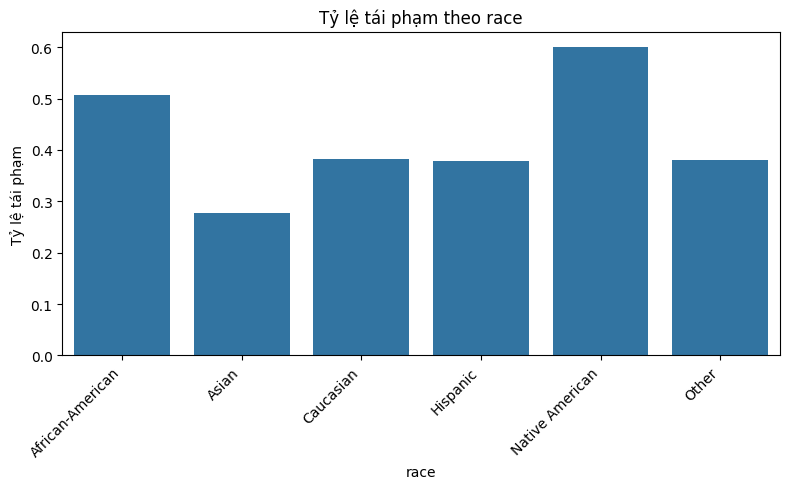


Tỷ lệ tái phạm theo c_charge_degree:
c_charge_degree
F    0.488588
M    0.378358
Name: two_year_recid, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_8372\2754077026.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recid_rate = df.groupby(col)['two_year_recid'].mean().sort_values(ascending=False)


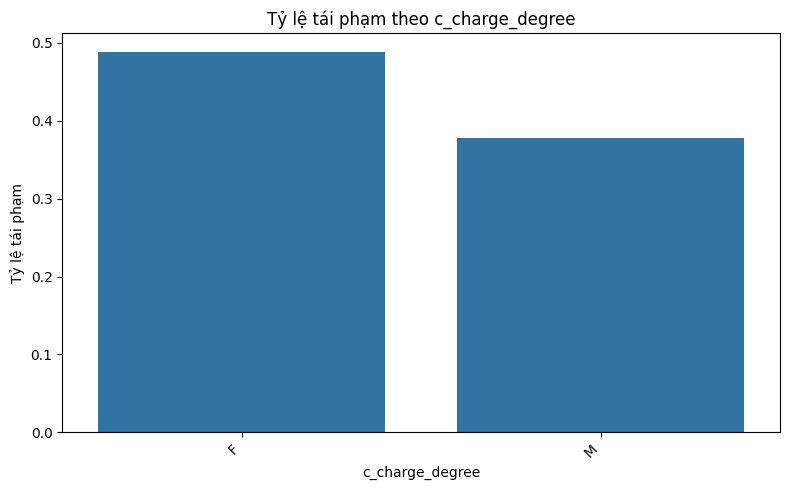

In [52]:
for col in cat_features:
    recid_rate = df.groupby(col)['two_year_recid'].mean().sort_values(ascending=False)
    print(f"\nTỷ lệ tái phạm theo {col}:")
    print(recid_rate)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=recid_rate.index, y=recid_rate.values)
    plt.title(f'Tỷ lệ tái phạm theo {col}')
    plt.xlabel(col)
    plt.ylabel('Tỷ lệ tái phạm')
    plt.xticks(rotation=45, ha='right') # Xoay nhãn nếu cần
    plt.tight_layout()
    plt.show()

In [53]:
# cols = ["sex", "race", "c_charge_degree"]

# n_rows = 1
# n_cols = 3

# fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

# for r in range(n_rows):
#     for c in range(n_cols):
#         i = r * n_cols + c  # index to loop through list "cols"
#         if i < len(cols):
#             ax_i = ax[c]  # vì chỉ có 1 hàng
#             sns.countplot(data=df, x=cols[i], hue="two_year_recid", palette="Blues", ax=ax_i)
#             ax_i.set_title(f"Figure {i+1}: two_year_recid vs {cols[i]}")
#             ax_i.legend(title='', loc='upper right', labels=['No', 'Yes'])

# plt.tight_layout()

## EDA for Numerical Features

In [46]:
df[num_features].describe()

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count
count,3951.000000,3914.000000,3907.000000,3945.000000,3944.000000
mean,34.609719,0.067195,0.072434,0.104943,3.403398
std,12.028491,0.526169,0.361520,0.467654,4.750941
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,2.000000
75%,42.000000,0.000000,0.000000,0.000000,5.000000
max,96.000000,20.000000,5.000000,9.000000,38.000000


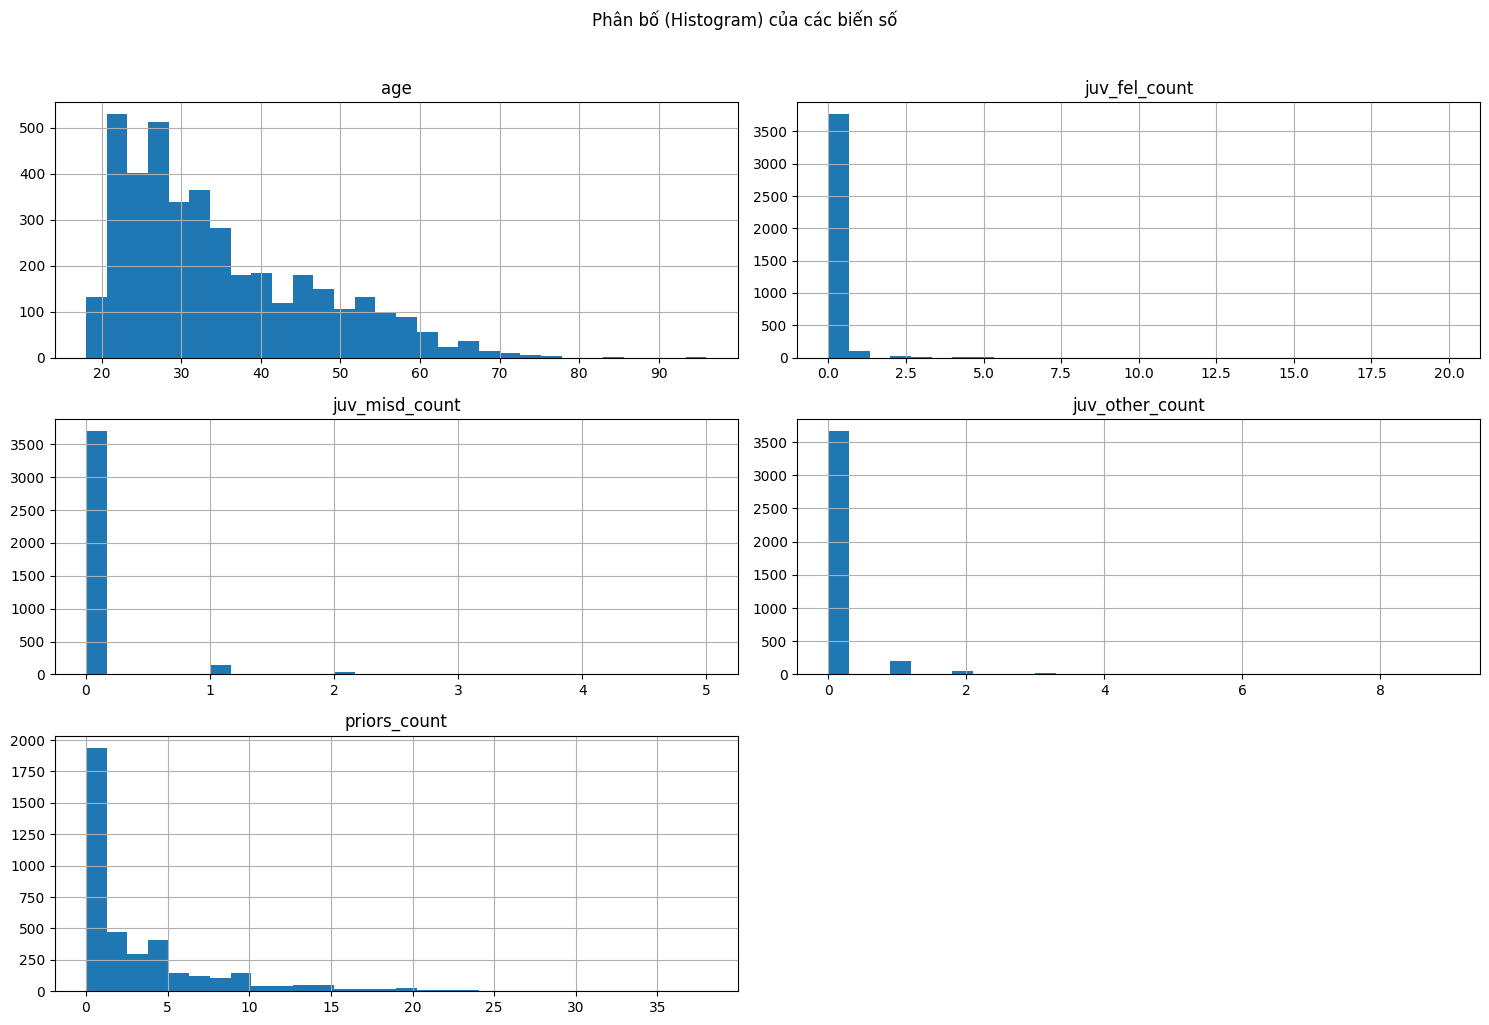

In [ ]:
df[num_features].hist(bins=40, figsize=(15, 10))
plt.suptitle('Phân bố (Histogram) của các biến số', y=1.02)
plt.tight_layout()
plt.show()

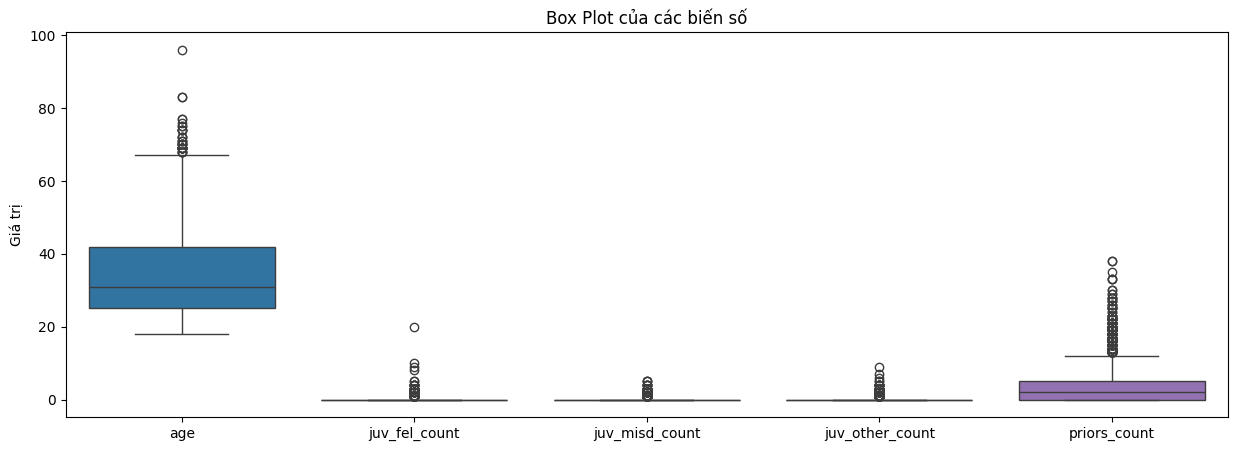

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[num_features])
plt.title('Box Plot của các biến số')
plt.ylabel('Giá trị')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

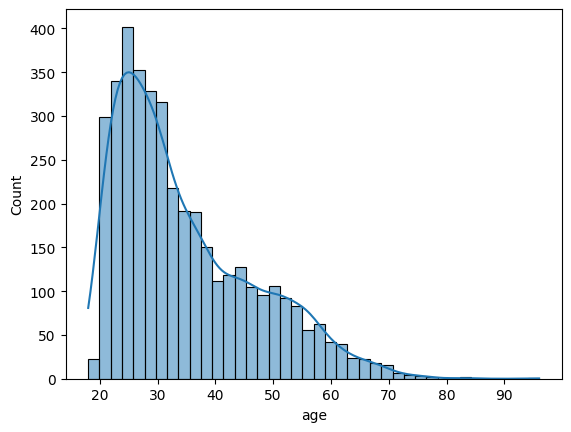

In [ ]:
#Age
sns.histplot(data=df, x="age", bins=40, kde=True)

<Axes: xlabel='age', ylabel='Count'>

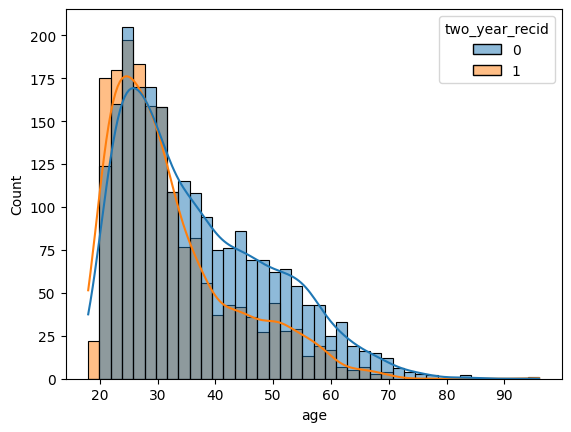

In [33]:
sns.histplot(data=df, x="age", hue="two_year_recid", bins=40, kde=True)

<Axes: xlabel='juv_fel_count', ylabel='Count'>

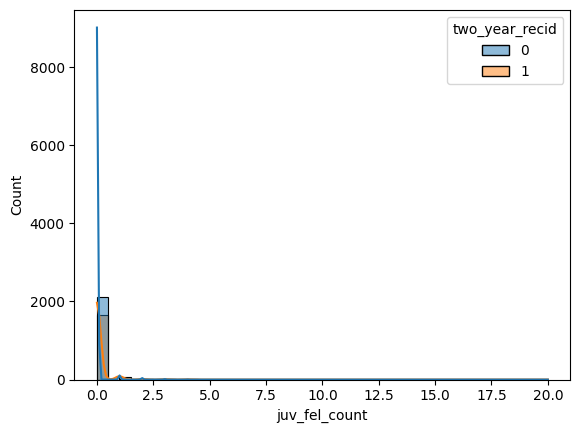

In [ ]:
# juv_fel_count	
sns.histplot(data=df, x="juv_fel_count", hue="two_year_recid", bins=40, kde=True)

<Axes: xlabel='juv_misd_count', ylabel='Count'>

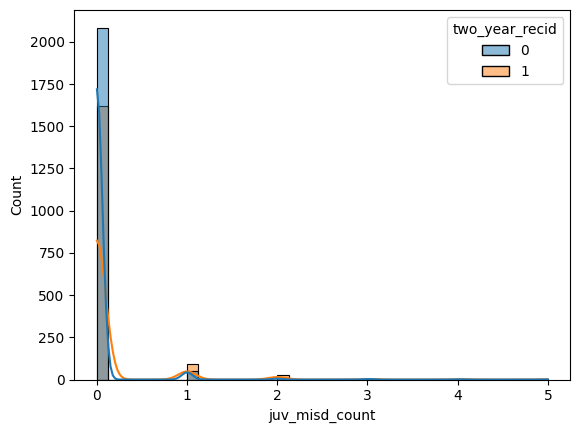

In [37]:
sns.histplot(data=df, x="juv_misd_count", hue="two_year_recid", bins=40, kde=True)

<Axes: xlabel='juv_other_count', ylabel='Count'>

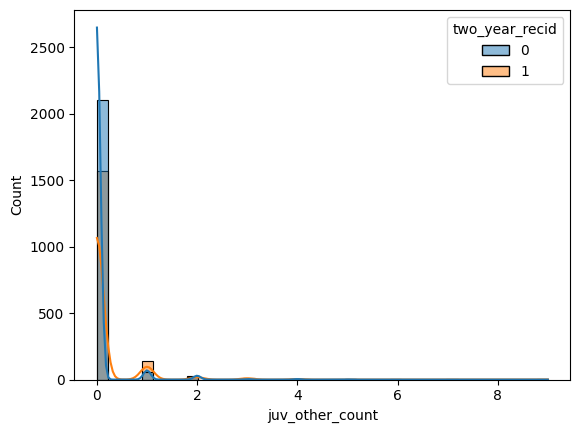

In [38]:
sns.histplot(data=df, x="juv_other_count", hue="two_year_recid", bins=40, kde=True)

<Axes: xlabel='priors_count', ylabel='Count'>

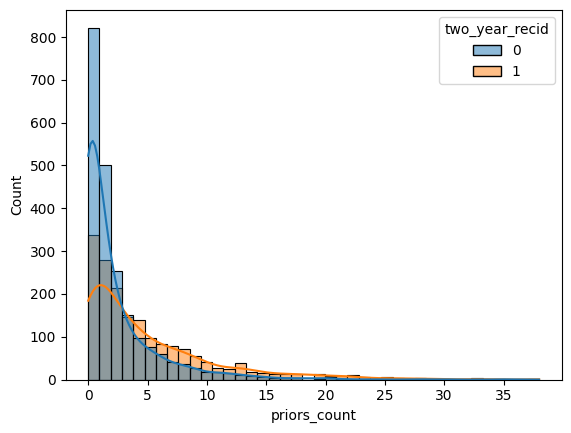

In [40]:
sns.histplot(data=df, x="priors_count", hue="two_year_recid", bins=40, kde=True)

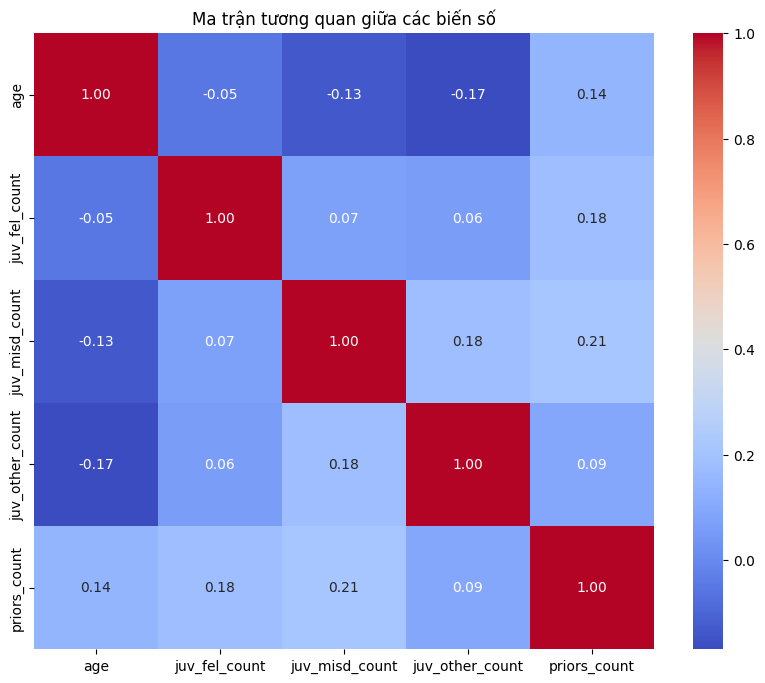

In [54]:
correlation_matrix = df[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

# Impute

In [3]:
train_path = r"D:\tune\train_data\train.json"
df = pd.read_json(train_path, lines=True)

In [4]:
def categorize_age(age):
    if pd.isna(age):
        return np.nan
    elif age < 25:
        return 'Less than 25'
    elif age <= 45:
        return '25 - 45'
    else:
        return 'Greater than 45'

df['age_cat'] = df['age'].apply(categorize_age)

In [5]:
df.drop(columns=['age'], inplace=True)

In [6]:
df.head(10)

,sex,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,age_cat
0,Male,Caucasian,NaN,0.0,NaN,0.0,None,0,NaN
1,Male,African-American,2.0,3.0,NaN,8.0,F,0,25 - 45
2,None,African-American,0.0,0.0,0.0,0.0,M,1,25 - 45
3,Male,African-American,0.0,NaN,0.0,NaN,M,1,Less than 25
4,None,None,0.0,1.0,0.0,3.0,F,0,25 - 45
5,None,None,0.0,0.0,NaN,4.0,None,0,NaN
6,None,African-American,0.0,0.0,NaN,12.0,M,0,Greater than 45
7,Male,Caucasian,0.0,0.0,0.0,NaN,M,0,Greater than 45
8,None,None,0.0,0.0,0.0,6.0,F,1,25 - 45
9,None,African-American,0.0,0.0,0.0,1.0,None,0,25 - 45


In [7]:
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

In [8]:
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

In [9]:
num_features

['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']

In [ ]:
for col in num_features:
    df[col].fillna(df[col].mean(), inplace=True)

for col in cat_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_10856\2753331735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [13]:
df.head(10)

,sex,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,age_cat
0,Male,Caucasian,0.067195,0.000000,0.104943,0.000000,F,0,25 - 45
1,Male,African-American,2.000000,3.000000,0.104943,8.000000,F,0,25 - 45
2,Male,African-American,0.000000,0.000000,0.000000,0.000000,M,1,25 - 45
3,Male,African-American,0.000000,0.072434,0.000000,3.403398,M,1,Less than 25
4,Male,African-American,0.000000,1.000000,0.000000,3.000000,F,0,25 - 45
5,Male,African-American,0.000000,0.000000,0.104943,4.000000,F,0,25 - 45
6,Male,African-American,0.000000,0.000000,0.104943,12.000000,M,0,Greater than 45
7,Male,Caucasian,0.000000,0.000000,0.000000,3.403398,M,0,Greater than 45
8,Male,African-American,0.000000,0.000000,0.000000,6.000000,F,1,25 - 45
9,Male,African-American,0.000000,0.000000,0.000000,1.000000,F,0,25 - 45


In [14]:
df.isnull().sum()

sex                0
race               0
juv_fel_count      0
juv_misd_count     0
juv_other_count    0
priors_count       0
c_charge_degree    0
two_year_recid     0
age_cat            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              5049 non-null   object 
 1   race             5049 non-null   object 
 2   juv_fel_count    5049 non-null   float64
 3   juv_misd_count   5049 non-null   float64
 4   juv_other_count  5049 non-null   float64
 5   priors_count     5049 non-null   float64
 6   c_charge_degree  5049 non-null   object 
 7   two_year_recid   5049 non-null   int64  
 8   age_cat          5049 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 355.1+ KB


In [19]:
df.nunique()

sex                 2
race                6
juv_fel_count      11
juv_misd_count      7
juv_other_count    10
priors_count       35
c_charge_degree     2
two_year_recid      2
age_cat             3
dtype: int64

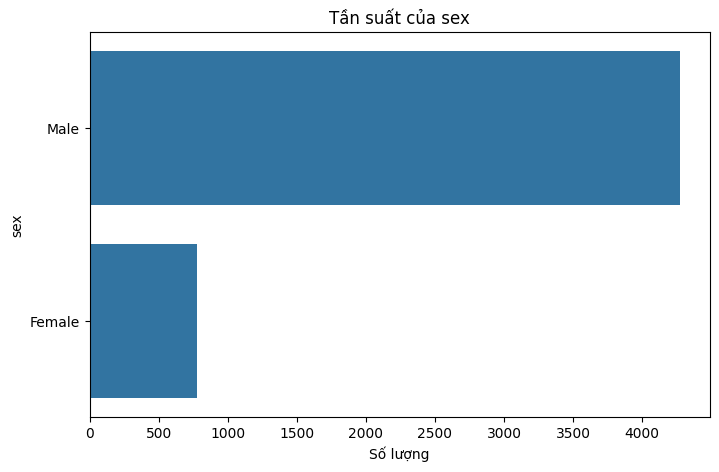


Tần suất của sex:
sex
Male      0.846306
Female    0.153694
Name: proportion, dtype: float64


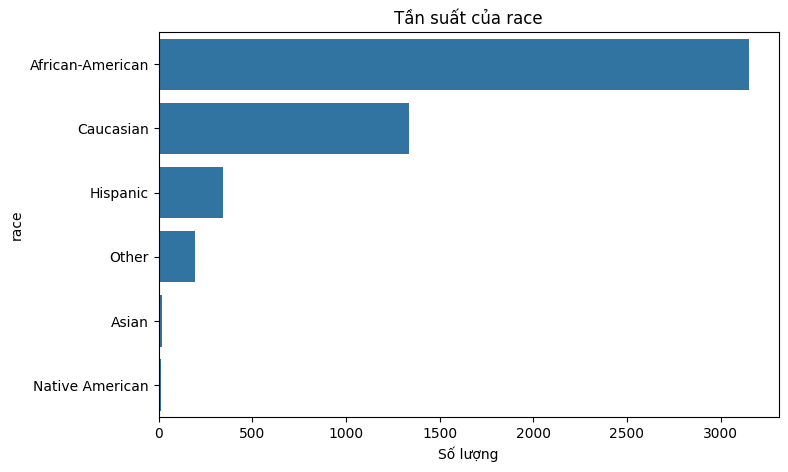


Tần suất của race:
race
African-American    0.624282
Caucasian           0.264211
Hispanic            0.067934
Other               0.038027
Asian               0.003565
Native American     0.001981
Name: proportion, dtype: float64


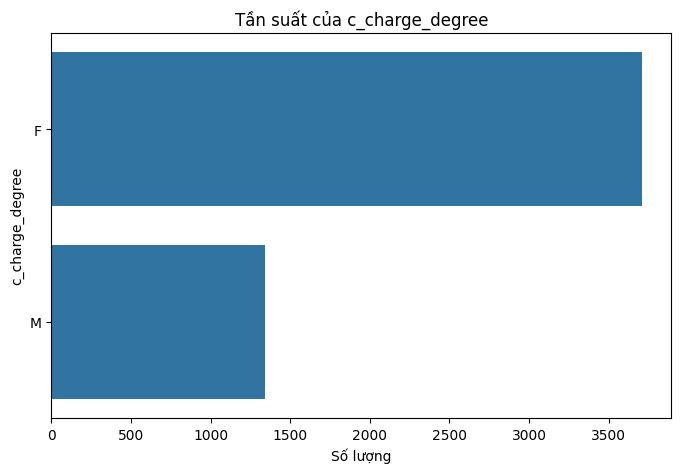


Tần suất của c_charge_degree:
c_charge_degree
F    0.734601
M    0.265399
Name: proportion, dtype: float64


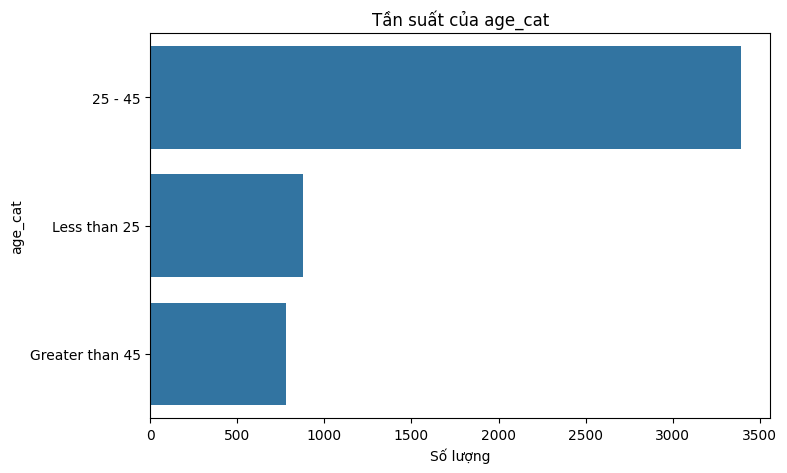


Tần suất của age_cat:
age_cat
25 - 45            0.671618
Less than 25       0.173698
Greater than 45    0.154684
Name: proportion, dtype: float64


In [16]:
for col in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index) # Sử dụng y để trục là category, order theo tần suất giảm dần
    plt.title(f'Tần suất của {col}')
    plt.xlabel('Số lượng')
    plt.ylabel(col)
    plt.show()
    print(f"\nTần suất của {col}:")
    print(df[col].value_counts(normalize=True))


Tỷ lệ tái phạm theo sex:
sex
Male      0.463843
Female    0.377577
Name: two_year_recid, dtype: float64


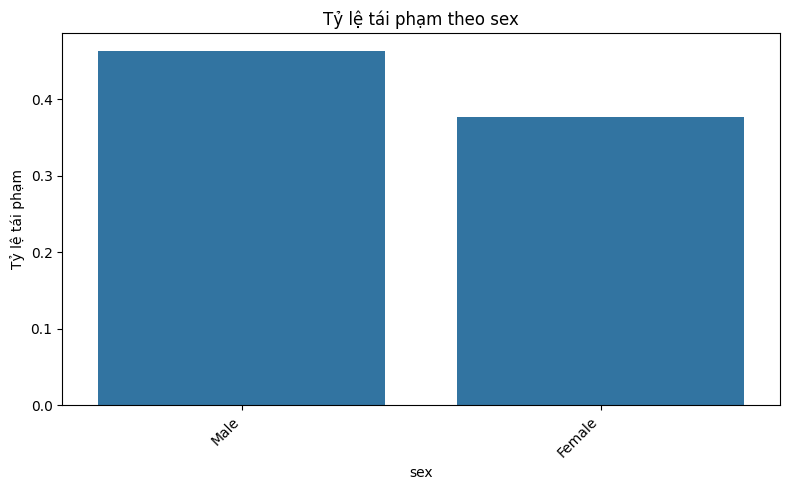


Tỷ lệ tái phạm theo race:
race
Native American     0.600000
African-American    0.492069
Caucasian           0.382309
Other               0.380208
Hispanic            0.379009
Asian               0.277778
Name: two_year_recid, dtype: float64


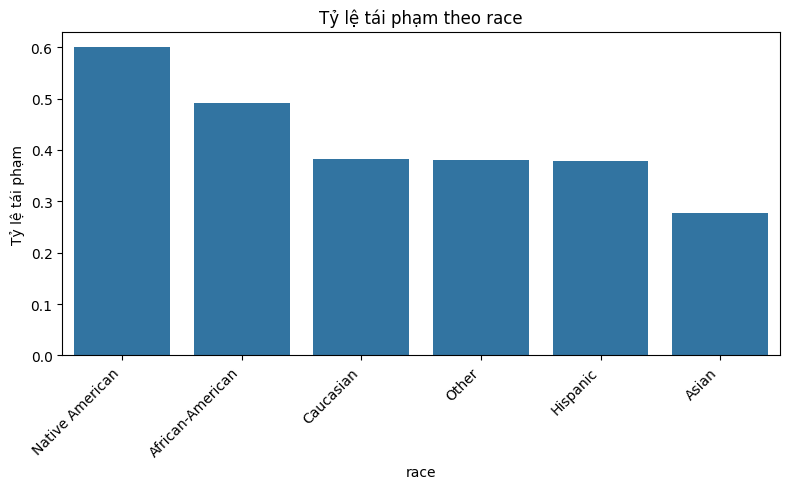


Tỷ lệ tái phạm theo c_charge_degree:
c_charge_degree
F    0.476678
M    0.378358
Name: two_year_recid, dtype: float64


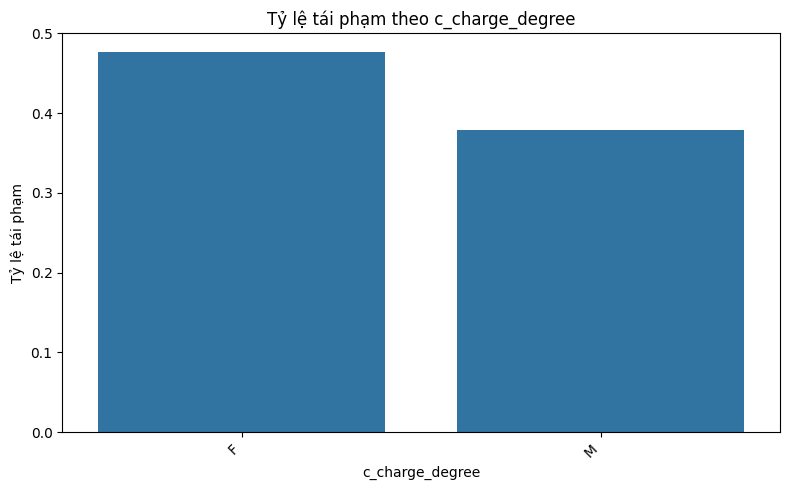


Tỷ lệ tái phạm theo age_cat:
age_cat
Less than 25       0.551881
25 - 45            0.457387
Greater than 45    0.307298
Name: two_year_recid, dtype: float64


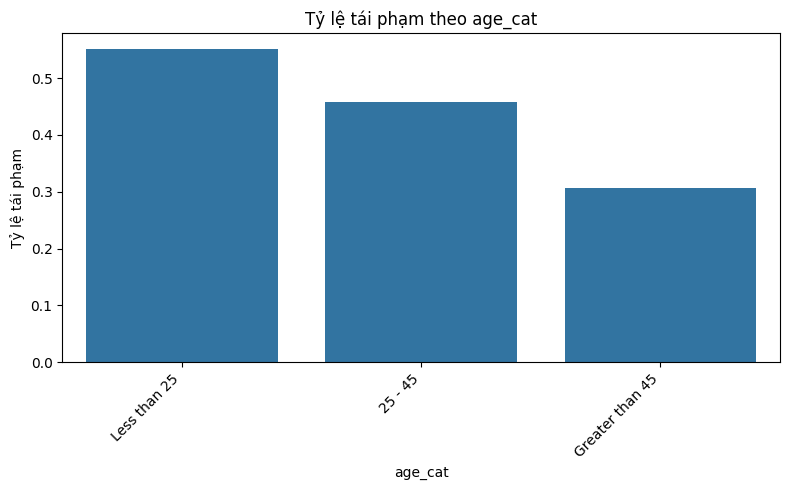

In [17]:
for col in cat_features:
    recid_rate = df.groupby(col)['two_year_recid'].mean().sort_values(ascending=False)
    print(f"\nTỷ lệ tái phạm theo {col}:")
    print(recid_rate)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=recid_rate.index, y=recid_rate.values)
    plt.title(f'Tỷ lệ tái phạm theo {col}')
    plt.xlabel(col)
    plt.ylabel('Tỷ lệ tái phạm')
    plt.xticks(rotation=45, ha='right') # Xoay nhãn nếu cần
    plt.tight_layout()
    plt.show()